# Convergence

Training convergence figures.

In [58]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot
from copy import deepcopy
import os

In [59]:
EXP_NAME = 'convergencia'

# ddpg
# ALGO_NAME = 'ddpg'
# filepath = "D:\Dev/sys-simulator-2\\data\\ddpg\\script7\\20210506-100648\\log.pickle"
# dql
ALGO_NAME = 'dql'
filepath = "D:\Dev/sys-simulator-2\DATA\DQL\SCRIPT52\\20210508-144816\\log.pickle"
# a2c
# ALGO_NAME = 'a2c'
# filepath = "D:\\Dev\\sys-simulator-2\\data\\a2c\\script16\\20210509-134816\\log.pickle"
# output path
OUTPUT_PATH = f'D:\\Dev\\sys-simulator-2\\figs\\{EXP_NAME}\\{ALGO_NAME}'

file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

In [60]:
data.keys()

dict_keys(['train_bags', 'test_bags', 'elapsed_time', 'eval_every', 'mue_sinr_threshold'])

In [61]:
EVAL_EVERY = data['eval_every']
EVAL_EVERY

2000

In [62]:
d_train = data['train_bags']
d_test = data['test_bags']
d_train.keys()

dict_keys(['losses', 'mue_sinrs', 'd2d_sinrs', 'collected_states', 'rewards'])

In [63]:
xx = d_test['mue_sinrs']
xx = np.array(xx)
xx.shape

(1000,)

In [64]:
xx = d_train['mue_sinrs']
xx = np.array(xx)
xx.shape

(20, 1000)

In [65]:
mue_sinrs = deepcopy(d_train['mue_sinrs'])
mue_sinrs.append(d_test['mue_sinrs'])
mue_sinrs = np.array(mue_sinrs)
mue_sinrs.shape

(21, 1000)

In [66]:
d2d_sinrs = deepcopy(d_train['d2d_sinrs'])
d2d_sinrs.append(d_test['d2d_sinrs'])
d2d_sinrs = np.array(d2d_sinrs)
d2d_sinrs.shape

(21, 1000, 2)

In [67]:
sinr_threshold = 6
mue_avail = deepcopy(mue_sinrs >= sinr_threshold)
mue_avail.shape

(21, 1000)

In [68]:
rewards = deepcopy(d_train['rewards'])
rewards.append(d_test['rewards'])
rewards = np.array(rewards)
rewards.shape

(21, 1000, 2)

## Fonts config

In [69]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}


## Ticks

In [70]:
x_ticks = [i*EVAL_EVERY*(mue_sinrs.shape[0]-1)/5 for i in range(6)]

## MUE SINR

In [71]:
x = np.ones(mue_sinrs.shape)
for i in range(mue_sinrs.shape[0]):
    x[i, :] = i
x = x.reshape(-1)
x *= EVAL_EVERY

In [72]:
mu = mue_sinrs.mean(axis=1)
std = mue_sinrs.std(axis=1)
conf95 = 1.96 * std / np.sqrt(mue_sinrs.shape[1])

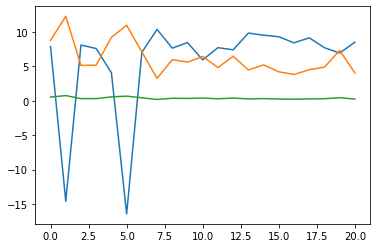

In [73]:
plt.figure()
plt.plot(mu)
plt.plot(std)
plt.plot(conf95)
plt.show()

D:\Dev\sys-simulator-2\figs\convergencia\dql\mue-sinr.svg


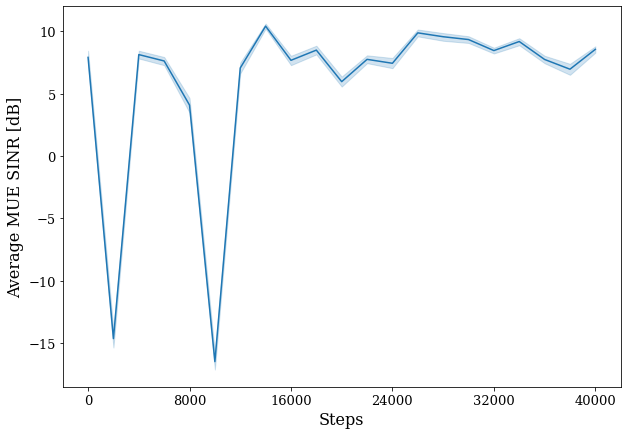

In [74]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_sinrs.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average MUE SINR [dB]', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-sinr'
svg_path = f'{OUTPUT_PATH}\\{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}\\{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## D2D SINR

In [75]:
y_font

{'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}

D:\Dev\sys-simulator-2\figs\convergencia\dql\d2d-sinr.svg


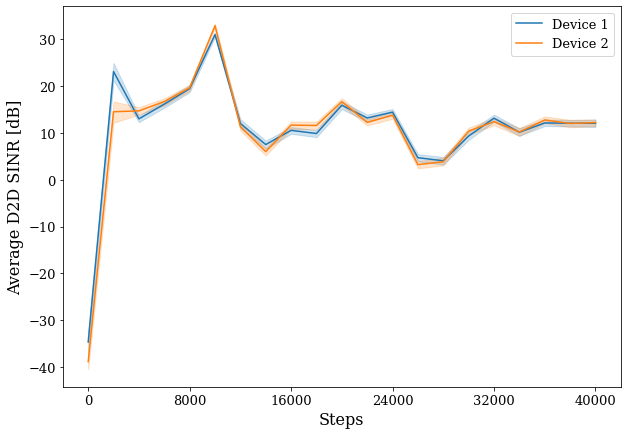

In [76]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_sinrs[:,:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_sinrs[:,:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average D2D SINR [dB]', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr'
svg_path = f'{OUTPUT_PATH}\\{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}\\{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE availability

D:\Dev\sys-simulator-2\figs\convergencia\dql\mue-availability.svg


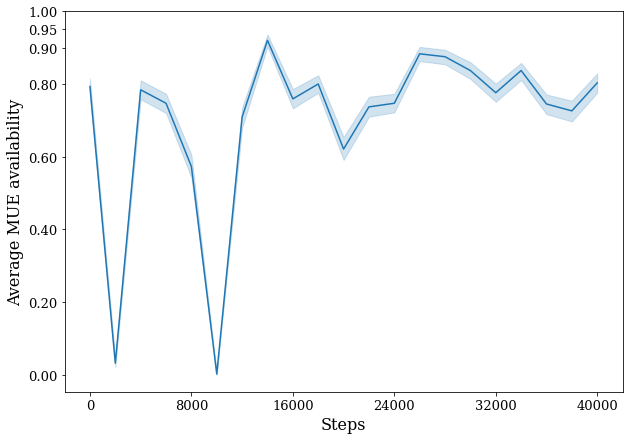

In [77]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_avail.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average MUE availability', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks([0., .2, .4, .6, .8, .9, .95, 1.], **ticks_font)
fig_name = 'mue-availability'
svg_path = f'{OUTPUT_PATH}\\{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}\\{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## Rewards

D:\Dev\sys-simulator-2\figs\convergencia\dql\rewards.svg


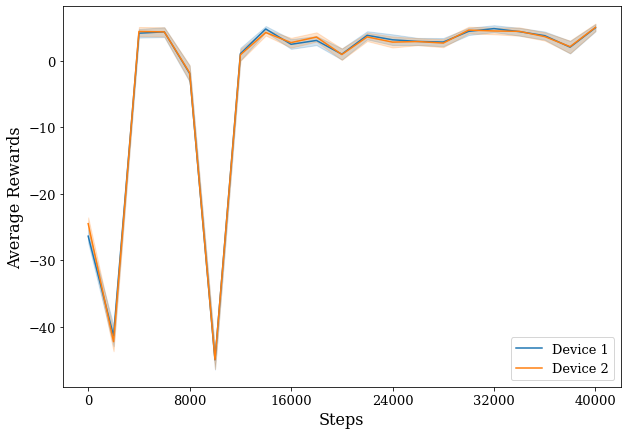

In [78]:
plt.figure(figsize=(10,7))
if rewards.shape[2] == 2:
    sns.lineplot(x=x, y=rewards[:,:,0].reshape(-1), label='Device 1')
    sns.lineplot(x=x, y=rewards[:,:,1].reshape(-1), label='Device 2')
else:
    sns.lineplot(x=x, y=rewards.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average Rewards', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'rewards'
svg_path = f'{OUTPUT_PATH}\\{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}\\{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()